# **Tool to visualize trends in SEE rates accross different orbits using the Peteren FOM method***  

**© 2023 Space Radiation Services Ltd**

www.radiation.company




The radiation experienced by electronics in different orbits varies substantially based on altitude and inclination. It can be difficult to determine how a part, board, or system, designed for one application will perform in a different orbit. The Petersen Figure of Merit (FOM)* method has been used to plot heatmaps of altitude vs inclination with colour indicating Single Event Effect (SEE) rates. This does not remove the need for detailed analysis, but serves as a visual guide to show how different orbits will impact SEE rates between Low Earth Orbit (LEO) and Geosynchronous Equatorial Orbit (GEO).


[*] E. L Petersen, "The SEU Figure of Merit and Proton Upset Rate Calculations," IEEE TRANSACTIONS ON NUCLEAR SCIENCE, VOL. 45, NO. 6, DECEMBER 1998



---


# Background on Petersen FOM method

Petersen developed a Figure of Merit (FOM) in 1983 as a useful parameter to describe part upset sensitivity, and to approximating upset rates in GEO. The FOM was refined in 1998 to predict upset rates in LEO which have contributions from trapped protons in the Van Allen belt.

The goal of the 1998 FOM refinement was to allow part upset susceptibility to be described by a single parameter, rather than the four Weibull parameters. The FOM describes a part’s susceptibility and can be obtained from either proton or heavy ion measurements, the aim being to eliminate the expense of making both types of experiment (please see the limitation section).

Petersen correlated the FOM from ground based testing with on-orbit event rates, providing a relation that that gives order of magnitude event rates for different orbits.


---

# Implementation and limitations

This tool was made by following Petersen's 1998 paper*, using the FOM equations and rate coefficents for different orbits.

<!-- ![alt text](https://i.imgur.com/u3UlifF.png) -->
Test data is needed to calulate on orbit event rates, and four types of data can be used:

1.   Proton test data - A single data point is needed, the limiting cross-section, described as events per proton per cm^2 (where protons are 100 - 200 MeV)
2.   Heavy ion test data - Full Weibull fit parameters for a heavy ion test, where event cross-sections are taken at multiple Linear Energy Transfer's (LET)
3.   On orbit event rates - Space Radiation Services added this as a way to correlate on-orbit data to different orbits
4.   Manual FOM entry - For users with their own calculated FOM or used for proton SEL.

There are some limitations to this approach:


*   All of Petersen's correlated data is from before 1998, and may not be as accurate for modern day electronics
*   There is an artificial low spot just over 7000 km due to limited data in the 1998 paper, as a result, some proton effects are missing over 7000 km
*   This method does not consider non-circular orbits or transfer orbits such as GEO transfer
*   **This approach is not a substitute for more detailed analysis and testing** - It is only designed to give order of magnitude results, and visually show how event rates will change in different orbits
*   When using the single point proton cross-section data, there are limitations, and it should be noted that there are events that do not occur with protons
  *   Primarily this method works for upsets (SEU) and functional interrupts (SEFI)
  *   For latch-ups (SEL) Normand[1] in 2004 extended the FOM proton method to using a subset of SEL data:
      *   Normand stated that some devices are susceptible  heavy ion SEL **and not** to proton SEL.
      *  Other devices are susceptible to heavy ion **and** proton SEL.
      *  Devices that are susceptible to proton SEL have a straight line relationship with FOM. All devices Normand examind that exibited proton induced SEL had an approximate FOM of 2e-4
<!-- ![alt text](https://i.imgur.com/NUSw39P.png) -->
  *   Proton testing alone does not give a complete picture of a component's radiation susceptibility, as mentioned above, some events only occur with higher LET heavy ion testing (eg, it is unusual to get upsets in flash with proton testing[2])
  *   Although many papers have used this approach for SEFI and SEL events, the proton FOM method was developed primarily for SEU's in volatile memory.

With those caveats in mind, there are many instances where cost, schedule, and risk tolerence mean that more detailed analysis and testing is not possible. A common example is new space companies looking at short duration demonstrations. As such, this approach can serve as a good fall back to ensure that events which could cause early mission failures do not occur. The most common being satellite resets happening multiple times per day preventing proper operation.

**References**

[1] E. Normand, "Extensions of the FOM Method—Proton SEL and Atmospheric Neutron SEU," IEEE TRANSACTIONS ON NUCLEAR SCIENCE, VOL. 51, NO. 6, DECEMBER 2004*

[2] T. Oldham et al, "Radiation Effects Test Guideline Document for Nonvolatile Memories: Lessons Learned," NASA Electronic Parts and Packaging (NEPP) Program, APRIL 2013*

---



# User input guide


**1) Select which type of SEE data you have**, there are three option:

*   Limiting proton cross-section
*   Heavy ion Weibull paramaters
*   On-orbit event rates
*   Manual FOM entry

**2) Based on your selection fill in the appropriate data:**

*  **2.1) Limiting proton cross-section** - This is proton test data where only a single data point is needed. The limiting cross-section is the number of events per proton per cm^2, where protons are 100 - 200 MeV. This is calculated as Total_events_recorded / Total_proton_flux (p/cm^2)
*  **2.2) On-orbit event rates** - Time averaged event rates observed on-orbit
  *  Approximate shielding thickness (mm of Al)
  *  Time averaged event rates (events per day)
  *  Altitude of the orbit (km)
  *  Inclination of the orbit (degrees)
*  **2.3) Heavy ion Weibull paramaters** - Weibull fit parameters for an LET cross-section curve. Using tabulated data for LET vs cross section, fit a Weibull curve (tools such as OMERE or Spenvis can do this for you)
  *  XS_limit: Limiting cross-section found at high LETs
  *  L_0: Onset LET threshold where a device shows a response to radiation
  *  w: Weibuill width parameter
  *  s: Weibull shape  parameter
*  **2.4) Manual FOM entry** - User defined FOM. Recommended by Normand[1] to be set as 2E-4 for SEL if a device has only been proton tested and exhibits SEL

**3) Enter the approximate shielding** thickness for the device you are simulating (mm of aluminium) - Do not select less than 2.5 mm as the model will not be representative.

# Understanding the output

Heatmaps are produced which plot events per day for circular LEO - GEO orbits. Orbits are represented on the figures as increasing altitude along the x-axis, increasing inclinations along the y-axis, and the heatmap scale as the event rate (events per day).

Three graph are produced:
1.  Small summary plot with two sub-plots for LEO and MEO - GEO orbits (note: the altitude scale is different for both plots to adequately dispay LEO which is a smaller range of altitude)
2. Detailed LEO plot - Including annotated heatmap values
3. Detailed MEO to GEO plot


Colour scale is configurable with the default is set to:

*  Minimum is 1 event every 10 years - Selected because this is considered suitably low to not be of concern
*  Maximum is 1 event every day - Selected because daily events will have a significant impact on operations

![alt text](https://i.imgur.com/qP0cUDa.png)


# Disclaimer

This tool is designed to visually show trends and serve as an education tool for people less familiar with radiation. It should not replace detailed radiation analysis.

---

# **Quick start**

Use the numbers currently set to generate example plots for the different input methods.


Limiting proton cross-section selected, FOM is 1.314e-06
FOM shielding factor is 0.963856230950138
Event rates vs orbits start: 


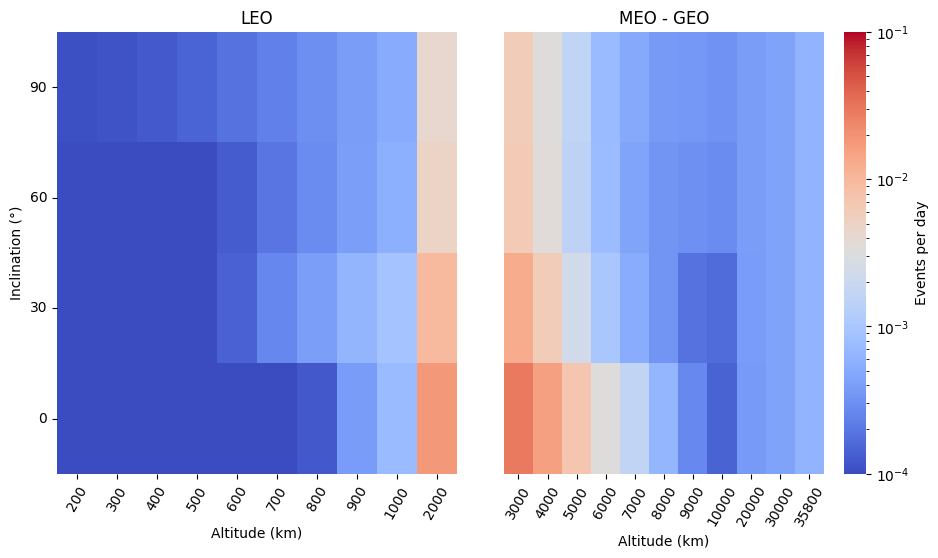

LEO:


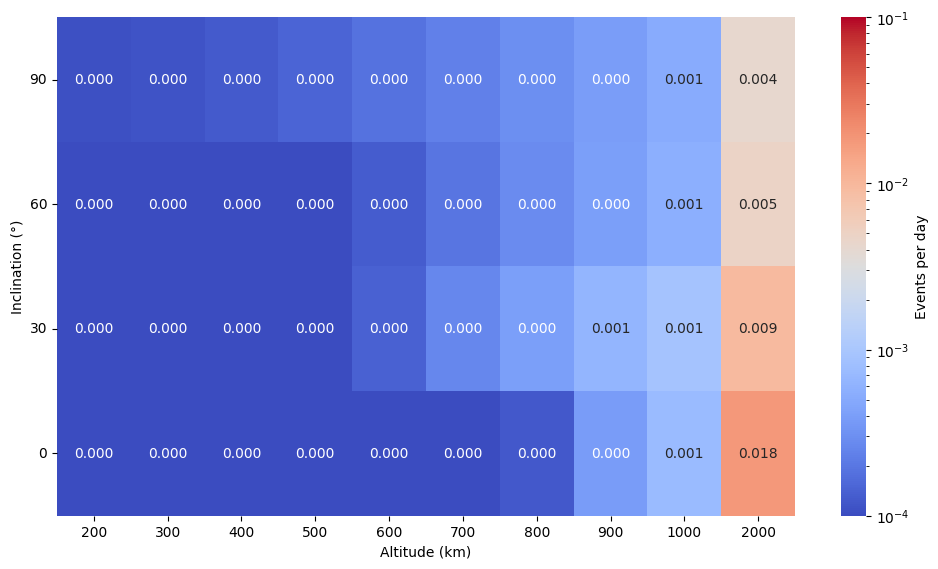

MEO - GEO:


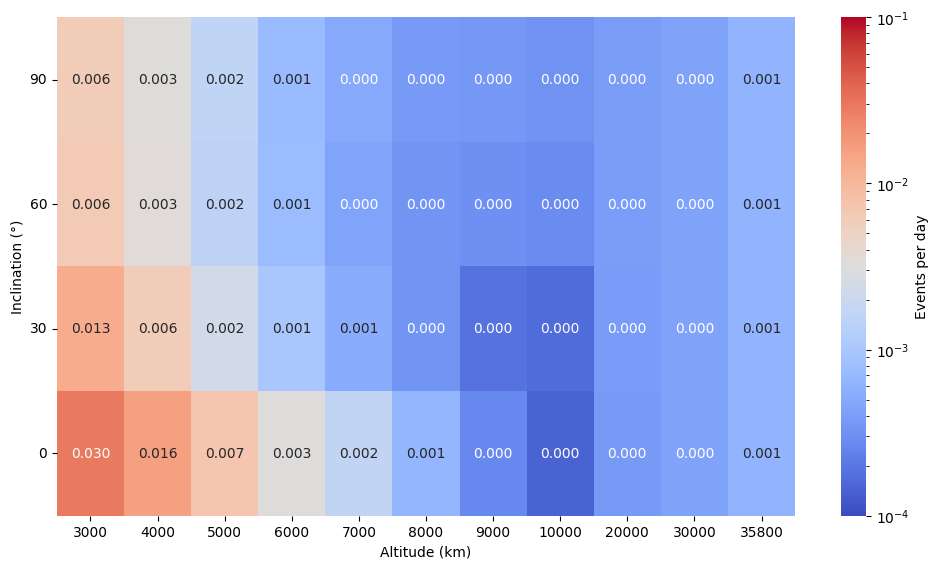

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files

#@markdown # 1) Select the type of SEE data you have:
Type_of_SEE_data = "Limiting proton cross-section" #@param ["Limiting proton cross-section", "On-orbit event rates", "Heavy ion weibull parameters", "Manual FOM entry"]


#@markdown # 2) Input selected test data
#@markdown ### 2.1) If using proton test data
#@markdown Enter limiting cross-section, events per proton per cm^2 (where protons are 100 - 200 MeV)
XS_PL =  2.92E-11#@param {type:"number"}

#@markdown ### 2.2) If using on-orbit event rates:
#@markdown Enter approximate shielding and orbit as well as time averaged event rates.

shield_thickness_mmAl =  3#@param {type:"number"}
average_events_per_day = 0.151#@param {type:"number"}
altitude_km = "500" #@param ["200", "300", "400", "500", "600", "700", "800", "900", "1000", "2000", "3000", "4000", "5000", "6000", "7000", "8000", "9000", "10000", "20000", "30000", "35800"]
inclination_deg = "90" #@param ["0", "30", "60", "90"]


#@markdown ### 2.3) If using heavy ion SEE data:
#@markdown Enter Weibull parameters
XS_limit  =  1e-2#@param {type:"number"}
L_0 =  8#@param {type:"number"}
w =  0.9#@param {type:"number"}
s =  1#@param {type:"number"}


#@markdown ### 2.4) If using manual FOM entry:
#@markdown User defined FOM, recommended by Normand[1] to be set as 2E-4 for SEL if a device has only been proton tested and exhibits SEL.
USER_FOM = 2E-04#@param {type:"number"}


# Digitized data from ref Petersen, E. L. The SEU figure of merit and proton upset rate calculations. IEEE Trans. Nucl. Sci. 45, 2550–2562 (1998).
proton_data = {
    'Altitude km': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 35800],
    '90 deg': [0.1, 0.6, 4.4, 17.9, 44.4, 80.1, 128.4, 198.9, 298.0, 3202.8, 4691.5, 2411.7, 1065.6, 391.1, 194.8, 84.8, 54.7, 28.6, 0.0, 0.0, 0.0],
    '60 deg': [0.1, 0.8, 4.7, 18.2, 44.4, 93.3, 160.0, 252.1, 371.4, 3729.4, 5020.2, 2624.4, 1065.7, 440.3, 191.5, 84.8, 54.7, 28.6, 0.0, 0.0, 0.0],
    '30 deg': [0.1, 1.6, 9.9, 41.6, 101.8, 196.5, 309.6, 496.2, 706.7, 7467.1, 9882.7, 4828.0, 1771.0, 719.4, 346.4, 181.6, 54.7, 28.6, 0.0, 0.0, 0.0],
    '0 deg': [0.0, 0.0, 0.0, 0.0, 0.1, 3.6, 88.5, 293.6, 567.1, 14208.4, 23427.5, 12461.4, 5600.0, 2561.3, 1254.4, 460.8, 145.5, 40.8, 0.0, 0.0, 0.0]
}

heavy_ion_data = {
    'Altitude km': [200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 35800],
    '90 deg': [85.1, 88.5, 93.6, 97.4, 99.7, 103.8, 104.5, 108.8, 108.8, 129.7, 147.4, 163.7, 174.5, 187.6, 196.9, 210.0, 218.6, 224.0, 311.7, 340.3, 485.0],
    '60 deg': [48.9, 52.1, 53.8, 56.0, 58.2, 59.6, 61.6, 63.6, 63.5, 84.9, 106.4, 124.1, 136.7, 149.4, 161.9, 175.6, 187.3, 196.6, 306.6, 343.0, 485.0],
    '30 deg': [7.3, 7.9, 8.5, 9.0, 9.5, 10.0, 10.5, 10.9, 11.4, 17.2, 26.7, 35.4, 45.9, 56.7, 68.8, 79.7, 90.0, 100.0, 304.2, 343.0, 485.0],
    '0 deg': [4.7, 5.1, 5.5, 5.9, 6.2, 6.6, 6.9, 7.4, 7.6, 11.8, 16.8, 23.0, 29.3, 36.2, 46.2, 57.5, 67.1, 74.0, 292.0, 340.3, 485.0]
}

# Make dataframs of the digitized data
proton_data = pd.DataFrame(proton_data)
heavy_ion_data = pd.DataFrame(heavy_ion_data)

proton_data.set_index('Altitude km', inplace=True)
heavy_ion_data.set_index('Altitude km', inplace=True)

# Get total contributions from heavy ions and protons
total_data = proton_data + heavy_ion_data

heavy_ion_data.reset_index(inplace=True)
proton_data.reset_index(inplace=True)
total_data.reset_index(inplace=True)


# Create a new DataFrame to store the transformed data
t_data = pd.DataFrame(columns=['Altitude_km', 'Inclination_deg', 'Rate_coeff'])

# Iterate over the columns and transform the data
for col in total_data.columns[1:]:
    deg = col.split(' ')[0]  # Extract the degree value
    values = total_data[col]  # Get the values for the column
    new_data_temp = pd.DataFrame({'Altitude_km': total_data['Altitude km'], 'Inclination_deg': deg, 'Rate_coeff': values})
    t_data = pd.concat([t_data, new_data_temp])

# Reset the index of the new DataFrame
t_data.reset_index(drop=True, inplace=True)

# Start calculating FOM for different methods
FOM = 0.0

if Type_of_SEE_data == "Limiting proton cross-section":
  FOM_P = 4.5e4 * XS_PL

  FOM = FOM_P
  print('Limiting proton cross-section selected, FOM is ' + str(FOM))


elif Type_of_SEE_data == "On-orbit event rates":
  # Filter the dataframe based on Altitude_km and Inclination_deg
  filtered_coeff = t_data.loc[(t_data['Altitude_km'] == int(altitude_km)) & (t_data['Inclination_deg'] == str(inclination_deg)), 'Rate_coeff'].item()  # Account for shielding of device

  orbit_shielding_factor = 2.0 - (0.5*math.log((shield_thickness_mmAl/0.0254), 10))

  FOM_ORB = (average_events_per_day / filtered_coeff) / orbit_shielding_factor

  FOM = FOM_ORB
  print('On-orbit event rates selected, FOM is ' + str(FOM))


elif Type_of_SEE_data == "Heavy ion weibull parameters":
  L_025 = L_0 + (w*(0.288**(1/s)))
  FOM_HI = XS_limit / (L_025**2)

  FOM = FOM_HI
  print('Heavy ion weibull parameters selected, FOM is ' + str(FOM))


elif Type_of_SEE_data == "Manual FOM entry":

  FOM = USER_FOM
  print('On-orbit event rates selected, FOM is ' + str(FOM))

#@markdown # 3) Approximate shielding for device
#@markdown Do not select less than 2.5 mm as the model will not be representative.

new_mission_average_shielding_mmAl =  3#@param {type:"number"}

# Scale FOM by shielding factor
shielding_factor = 2.0 - (0.5*math.log((new_mission_average_shielding_mmAl/0.0254), 10))
FOM = FOM * shielding_factor
print('FOM shielding factor is ' + str(shielding_factor))

t_data["Rate"] = t_data["Rate_coeff"] * FOM


#@markdown # 4) Set min and max for colour scale
#@markdown Minimum currently set as 1 event every 10 years - Selected because this is considered suitably low to not be of concern.

#@markdown Maximum currently set as 1 event every day - Selected because daily events will have a significant impact on operations.
plot_min = 0.0001 #@param {type:"number"}
plot_max = 0.1 #@param {type:"number"}

plot_center = (1/7)
#
# ----------------------------------PLOTS FOR REPORTS
#

plt.rcParams['font.family'] = "Sans-serif"

# Make LEO and MEO - GEO datasets
t_data_LEO = t_data[(t_data['Altitude_km'] < 2001)]
t_data_MEO = t_data[(t_data['Altitude_km'] > 2999)]

# Make pivot table for plts of 1) LEO, 2) MEO-GEO
# Also sort so 0 it at bottom of graph not top
pivotted_plot_1 = pd.pivot_table(data=t_data_LEO,
                    index='Inclination_deg',
                    values='Rate',
                    columns='Altitude_km')
pivotted_plot_1 = pivotted_plot_1.sort_values(by='Inclination_deg',
                                              ascending=False)
pivotted_plot_2 = pd.pivot_table(data=t_data_MEO,
                    index='Inclination_deg',
                    values='Rate',
                    columns='Altitude_km')
pivotted_plot_2 = pivotted_plot_2.sort_values(by='Inclination_deg',
                                              ascending=False)

#
# ---------- Start subplots for reports
#

print('Event rates vs orbits start: ')
f, axes = plt.subplots(1, 2)

sns.heatmap(pivotted_plot_1, norm=matplotlib.colors.LogNorm(vmax=plot_max, vmin=plot_min),
                      cmap="coolwarm",
                      ax=axes[0],
                      annot=False, fmt=".0f", cbar=None)
sns.heatmap(pivotted_plot_2, norm=matplotlib.colors.LogNorm(vmax=plot_max, vmin=plot_min),
                      cmap="coolwarm",
                      ax=axes[1],
                      annot=False, fmt=".0f",
                      cbar_kws={'label': 'Events per day'})


# Make Y labels horizontal
for tick in axes[0].get_yticklabels():
    tick.set_rotation(0)

# Make X labels readable
for tick in axes[0].get_xticklabels():
    tick.set_rotation(60)
for tick in axes[1].get_xticklabels():
    tick.set_rotation(60)

# Axis labels
axes[0].set_xlabel('Altitude (km)')
axes[1].set_xlabel('Altitude (km)')
axes[0].set_ylabel('Inclination (\N{DEGREE SIGN})')
axes[1].set_ylabel('')
axes[1].yaxis.set_visible(False)
axes[0].title.set_text('LEO')
axes[1].title.set_text('MEO - GEO')

# Tight fit, sizw and plot
f.tight_layout(rect=[0, 0, .9, 1])
f.set_size_inches(12, 6)

plt.show()

#
# -------- LEO
#

print('LEO:')
fig, ax = plt.subplots()

ax = sns.heatmap(pivotted_plot_1, norm=matplotlib.colors.LogNorm(vmax=plot_max, vmin=plot_min),
                      cmap="coolwarm",
                      annot=True, annot_kws={'size':10}, fmt=".3f",
                      cbar_kws={'label': 'Events per day'})

for tick in ax.get_yticklabels():
    tick.set_rotation(0)

for tick in ax.get_xticklabels():
    tick.set_rotation(0)

fig.tight_layout(rect=[0, 0, .9, 1])
fig.set_size_inches(12, 6)

plt.xlabel('Altitude (km)')
plt.ylabel('Inclination (\N{DEGREE SIGN})')

plt.show()

#
# -------- MEO
#
print('MEO - GEO:')

fig, ax = plt.subplots()

ax = sns.heatmap(pivotted_plot_2, norm=matplotlib.colors.LogNorm(vmax=plot_max, vmin=plot_min),
                      cmap="coolwarm",
                      annot=True, annot_kws={'size':10}, fmt=".3f",
                      cbar_kws={'label': 'Events per day'})

for tick in ax.get_yticklabels():
    tick.set_rotation(0)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

fig.tight_layout(rect=[0, 0, .9, 1])
fig.set_size_inches(12, 6)
plt.xlabel('Altitude (km)')
plt.ylabel('Inclination (\N{DEGREE SIGN})')

plt.show()

